# Requirements

## Layout requirements

Generate a layout for each assay in a csv format containing the following columns:

- "Well": name of each well, i.e., A1, A2, A3....
- "Treatment": name of the treatment contained in each well, i.e., Control, Nanoparticle....
- "Cell": name of the cell lineage that was used in that well.

The filename must be: "layout_YYYYMMDD.csv"

## Data format
Have a csv file containing the following informations in each column:
- "Time": time taken to acquire each image, preferably in minutes.
- "Area": area measured in each image at that point in time, preferably in pixels.

# Inputs and Libraries

In [5]:
import utilitary
import easygui as eg
%matplotlib inline
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Objective

This objective conversion is based on Cytation 5 Biotek microscope lenses. The pixels to micrometers value will depend upon your microscope and objective. 

So please, if you have different values, edit them on the utilitary function fig_micrometers().

In [14]:
objective_conversion = utilitary.fig_micrometers()
figname = eg.fileopenbox(msg="Choose an image from your dataset to calculate area and height", default='*', filetypes=None, multiple=False)
pic_total_area = utilitary.fig_total_area(figname)
pic_height = utilitary.pic_height(figname)

Objective conversion from um to pixels is 1.611928 micrometers.
Total area in pixels = 1106496
Picture height = 904


## Define variables for csv file

In [12]:
path_files = eg.diropenbox('Where are the csv files?')
out_path = utilitary.output_folder(path_files = path_files) #create output folder
suffix = eg.enterbox(msg="What's the suffix that comes after the name of the well? Example: _dados, _data, etc.", default='', strip=True)
area_column = eg.enterbox(msg="What's the name of the column containing the AREA of the scratch?", default='', strip=True)
time_column = eg.enterbox(msg="What's the name of the column containig the TIME between each picture?", default='', strip=True)

_data Area (pixel^2) Time (min)


## Import layout of your plate

In [17]:
layout, date = utilitary.open_layout()
layout = utilitary.add_columns(layout)
layout.head(25)

,Well,Cell,Treatment,Slope,Intercept,R^2 score,Velocity,Time,Begin,End
0,A1,PNT1A,Control,0.0,0.0,0.0,0.0,0.0,0.0,0.6
1,A2,PNT1A,Control,0.0,0.0,0.0,0.0,0.0,0.0,0.6
2,A3,PNT1A,Methacycline 5 uM,0.0,0.0,0.0,0.0,0.0,0.0,0.6
3,A4,PC3,Control,0.0,0.0,0.0,0.0,0.0,0.0,0.6
4,A5,PC3,Control,0.0,0.0,0.0,0.0,0.0,0.0,0.6
5,A6,PC3,Methacycline 5 uM,0.0,0.0,0.0,0.0,0.0,0.0,0.6
6,B1,PNT1A,TGF-B 1 ng/mL,0.0,0.0,0.0,0.0,0.0,0.0,0.6
7,B2,PNT1A,TGF-B 1 ng/mL,0.0,0.0,0.0,0.0,0.0,0.0,0.6
8,B3,PNT1A,Methacycline 10 uM,0.0,0.0,0.0,0.0,0.0,0.0,0.6
9,B4,PC3,TGF-B 1 ng/mL,0.0,0.0,0.0,0.0,0.0,0.0,0.6


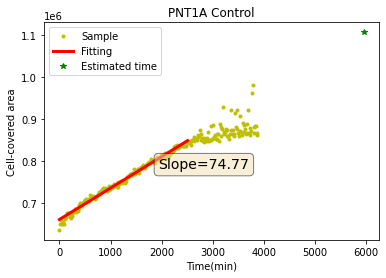

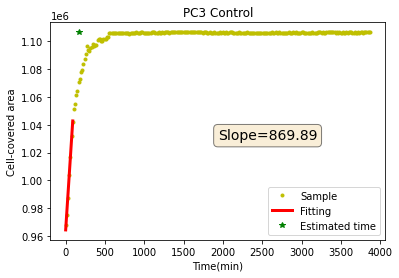

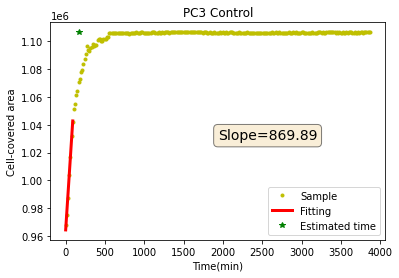

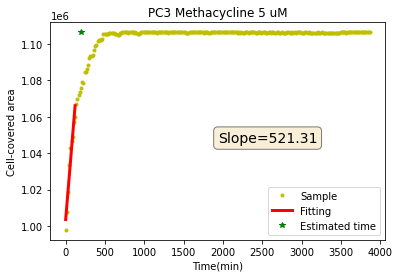

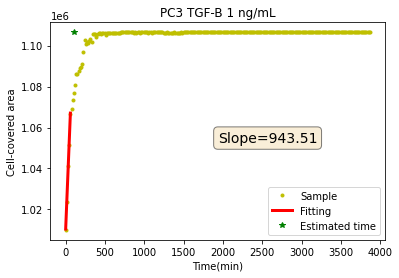

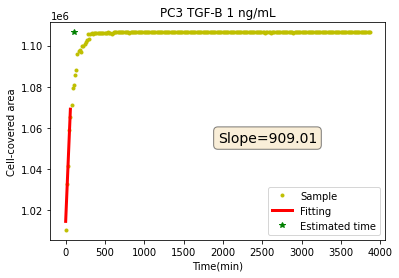

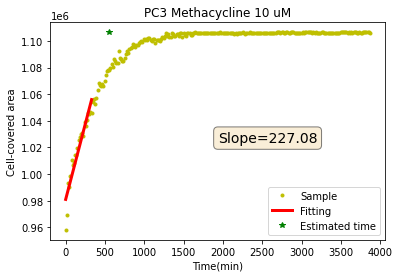

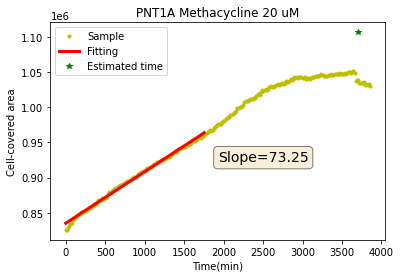

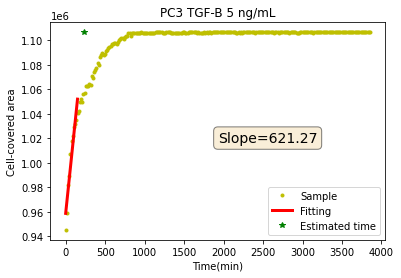

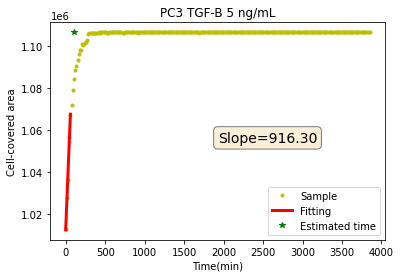

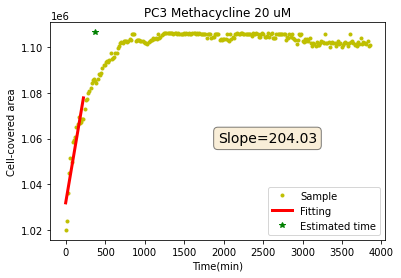

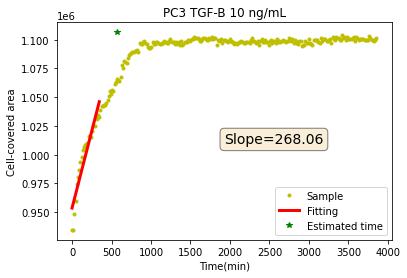

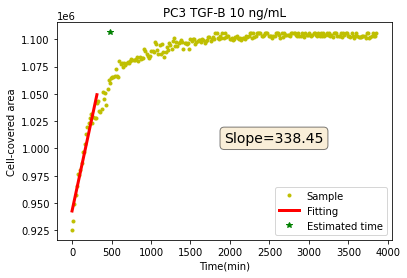

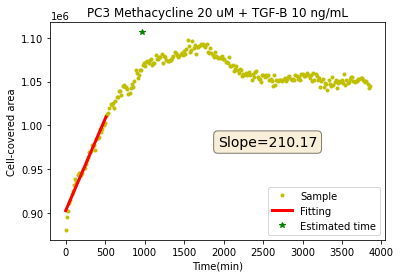

In [18]:
for i, row in layout.iterrows():
    well = row['Well']
    index = row.name
    try:
        df = utilitary.open_df(well, pic_total_area, suffix = suffix, area_column = area_column, path_files = path_files)
        begin, end = utilitary.define_end(df, layout, index)
        X, y, reg = utilitary.fit_linear_regression(df, layout, begin, end, index, time_column = time_column)
        x_fit, y_fit = utilitary.calculate_fit(df, layout, begin, end, index, time_column = time_column)
        time = utilitary.time_velocity(layout, index, pic_total_area)
        velocity = utilitary.migration_velocity(layout, index, pic_height, objective_conversion)
        utilitary.plot(df, layout, begin, end, index, date, well, time, pic_total_area, x_fit, y_fit, time_column = time_column, output_path = out_path)
    except FileNotFoundError:
        layout = layout.drop([index])

In [19]:
layout

,Well,Cell,Treatment,Slope,Intercept,R^2 score,Velocity,Time,Begin,End
0,A1,PNT1A,Control,74.774034,6.615215e+05,0.988329,0.066665,99.182045,0.0,0.6
3,A4,PC3,Control,869.888095,9.644765e+05,0.993413,0.775551,2.721031,0.0,0.6
4,A5,PC3,Control,869.888095,9.644765e+05,0.993413,0.775551,2.721031,0.0,0.6
5,A6,PC3,Methacycline 5 uM,521.305000,1.003566e+06,0.944380,0.464771,3.290782,0.0,0.6
9,B4,PC3,TGF-B 1 ng/mL,943.506667,1.010423e+06,0.995194,0.841186,1.697087,0.0,0.6
10,B5,PC3,TGF-B 1 ng/mL,909.006667,1.014558e+06,0.965514,0.810428,1.685684,0.0,0.6
11,B6,PC3,Methacycline 10 uM,227.081159,9.810126e+05,0.896845,0.202455,9.209882,0.0,0.6
14,C3,PNT1A,Methacycline 20 uM,73.247542,8.351627e+05,0.995131,0.065304,61.738890,0.0,0.6
15,C4,PC3,TGF-B 5 ng/mL,621.270000,9.587214e+05,0.918714,0.553895,3.964315,0.0,0.6
16,C5,PC3,TGF-B 5 ng/mL,916.296667,1.012567e+06,0.986836,0.816927,1.708482,0.0,0.6


## Change the fitting manually

- If you'd like to change a fitting (fit more or less data, different from 60%) use the following function:

In [226]:
layout

,Well,Cell,Treatment,Slope,Intercept,R^2 score,Velocity,Time,Begin,End
0,A1,PNT1A,Control,74.774034,6.615215e+05,0.988329,0.066665,99.182045,0.0,0.6
3,A4,PC3,Control,869.888095,9.644765e+05,0.993413,0.775551,2.721031,0.0,0.6
4,A5,PC3,Control,869.888095,9.644765e+05,0.993413,0.775551,2.721031,0.0,0.6
5,A6,PC3,Methacycline 5 uM,521.305000,1.003566e+06,0.944380,0.464771,3.290782,0.0,0.6
9,B4,PC3,TGF-B 1 ng/mL,943.506667,1.010423e+06,0.995194,0.841186,1.697087,0.0,0.6
10,B5,PC3,TGF-B 1 ng/mL,909.006667,1.014558e+06,0.965514,0.810428,1.685684,0.0,0.6
11,B6,PC3,Methacycline 10 uM,386.262020,9.701564e+05,0.830870,0.344373,5.882865,0.0,0.4
14,C3,PNT1A,Methacycline 20 uM,73.247542,8.351627e+05,0.995131,0.065304,61.738890,0.0,0.6
15,C4,PC3,TGF-B 5 ng/mL,621.270000,9.587214e+05,0.918714,0.553895,3.964315,0.0,0.6
16,C5,PC3,TGF-B 5 ng/mL,916.296667,1.012567e+06,0.986836,0.816927,1.708482,0.0,0.6


In [229]:
utilitary.change_end_fit(layout)

Enter indexes from the wells you wish to change separated by space 18 19
Enter the value you'd like to change the end of the fitting (from 0.6 to?) 0.4


## Save results in a csv file

In [89]:
layout.to_csv(out_path + '/Results_' + date + '.csv', sep = ',')

In [90]:
layout

,Well,Cell,Treatment,Slope,Intercept,R^2 score,Velocity,Time,Begin,End
0,A1,PNT1A,Control,74.774034,6.615215e+05,0.988329,0.066665,99.182045,0.0,0.6
3,A4,PC3,Control,869.888095,9.644765e+05,0.993413,0.775551,2.721031,0.0,0.6
4,A5,PC3,Control,869.888095,9.644765e+05,0.993413,0.775551,2.721031,0.0,0.6
5,A6,PC3,Methacycline 5 uM,521.305000,1.003566e+06,0.944380,0.464771,3.290782,0.0,0.6
9,B4,PC3,TGF-B 1 ng/mL,943.506667,1.010423e+06,0.995194,0.841186,1.697087,0.0,0.6
10,B5,PC3,TGF-B 1 ng/mL,909.006667,1.014558e+06,0.965514,0.810428,1.685684,0.0,0.6
11,B6,PC3,Methacycline 10 uM,227.081159,9.810126e+05,0.896845,0.202455,9.209882,0.0,0.6
14,C3,PNT1A,Methacycline 20 uM,73.247542,8.351627e+05,0.995131,0.065304,61.738890,0.0,0.6
15,C4,PC3,TGF-B 5 ng/mL,621.270000,9.587214e+05,0.918714,0.553895,3.964315,0.0,0.6
16,C5,PC3,TGF-B 5 ng/mL,916.296667,1.012567e+06,0.986836,0.816927,1.708482,0.0,0.6
